# Salary vs. Record

In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

In [2]:
#create dataframe with team information
teams_filename = './Data/Teams.csv'
teams_df = pd.read_csv(teams_filename)
teams_df.head()


,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


In [3]:
#create salaries dataframe 
salaries_filename='./Data/Salaries.csv'
salaries_df = pd.read_csv(salaries_filename)
salaries_df

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000
...,...,...,...,...,...
25570,2015,WAS,NL,treinbl01,512800
25571,2015,WAS,NL,ugglada01,507500
25572,2015,WAS,NL,werthja01,21000000
25573,2015,WAS,NL,zimmejo02,16500000


In [4]:
#sum up the salaries for each team 
sum_salaries=salaries_df.groupby(['teamID', 'yearID']).sum()
sum_salaries

salary
teamID yearID           
ANA    1997     31135472
       1998     41281000
       1999     55388166
       2000     51464167
       2001     47535167
...                  ...
WAS    2011     63856928
       2012     80855143
       2013    113703270
       2014    131983680
       2015    155587472

[888 rows x 1 columns]

In [5]:

#sort the values

In [6]:
sum_salaries.sort_values('salary',ascending=False)

salary
teamID yearID           
NYA    2013    231978886
LAN    2013    223362196
       2014    217014600
       2015    215792000
NYA    2015    212751957
...                  ...
MIN    1985      5764821
TEX    1988      5342131
SEA    1985      4613000
       1987      2263500
TEX    1987       880000

[888 rows x 1 columns]

In [7]:
#make a dataframe so we have the columns we want for the teams 
merged_df= teams_df[['yearID','teamID','G','W','L']]
merged_df

,yearID,teamID,G,W,L
0,1871,BS1,31,20,10
1,1871,CH1,28,19,9
2,1871,CL1,29,10,19
3,1871,FW1,19,7,12
4,1871,NY2,33,16,17
...,...,...,...,...,...
2800,2015,LAN,162,92,70
2801,2015,SFN,162,84,78
2802,2015,ARI,162,79,83
2803,2015,SDN,162,74,88


In [8]:
#merge both dataframes for final datafram to have each team, year, record, and sum salary
sum_df=merged_df.groupby(['teamID', 'yearID']).sum()
final_df=sum_df.merge(sum_salaries, on=(['teamID','yearID']))
final_df=final_df.sort_values('salary',ascending=False)


In [9]:
#find team with biggest spent salary
small_df=final_df.head(20)
small_df.head()

G   W   L     salary
teamID yearID                        
NYA    2013    162  85  77  231978886
LAN    2013    162  92  70  223362196
       2014    162  94  68  217014600
       2015    162  92  70  215792000
NYA    2015    162  87  75  212751957

In [10]:
#now that we know the year of the biggest spent salary find the other teams and their records 
twenty_thirteen_df=teams_df.loc[teams_df['yearID']==2013,:]
twenty_thirteen_df.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
2715,2013,NL,ARI,ARI,W,2,162,81.0,81,81,...,135.0,0.988,Arizona Diamondbacks,Chase Field,2134795.0,102,102,ARI,ARI,ARI
2716,2013,NL,ATL,ATL,E,1,162,81.0,96,66,...,141.0,0.986,Atlanta Braves,Turner Field,2548679.0,104,103,ATL,ATL,ATL
2717,2013,AL,BAL,BAL,E,3,162,81.0,85,77,...,165.0,0.991,Baltimore Orioles,Oriole Park at Camden Yards,2357561.0,106,105,BAL,BAL,BAL
2718,2013,AL,BOS,BOS,E,1,162,81.0,97,65,...,142.0,0.987,Boston Red Sox,Fenway Park II,2833333.0,102,102,BOS,BOS,BOS
2719,2013,AL,CHA,CHW,C,5,162,81.0,63,99,...,155.0,0.980,Chicago White Sox,U.S. Cellular Field,1768413.0,107,107,CHW,CHA,CHA


In [11]:
#make a new data frame for the rest of the teams in 2013 to see if their salaries effected their records
grouped_data=twenty_thirteen_df.groupby(['teamID', 'yearID']).sum()
new_df=grouped_data.merge(sum_salaries, on=(['teamID','yearID']))
new_df.head()

,,Rank,G,Ghome,W,L,R,AB,H,2B,3B,...,HRA,BBA,SOA,E,DP,FP,attendance,BPF,PPF,salary
teamID,yearID,,,,,,,,,,,,,,,,,,,,,
ARI,2013,2,162,81.0,81,81,685,5676,1468,302,31,...,176,485,1218,75,135.0,0.988,2134795.0,102,102,90132000
ATL,2013,1,162,81.0,96,66,688,5441,1354,247,21,...,127,409,1232,85,141.0,0.986,2548679.0,104,103,87871525
BAL,2013,3,162,81.0,85,77,745,5620,1460,298,14,...,202,473,1169,54,165.0,0.991,2357561.0,106,105,84393333
BOS,2013,1,162,81.0,97,65,853,5651,1566,363,29,...,156,524,1294,80,142.0,0.987,2833333.0,102,102,151530000
CHA,2013,5,162,81.0,63,99,598,5563,1385,237,19,...,182,509,1249,121,155.0,0.980,1768413.0,107,107,120065277


the r value is 0.2995794485462569


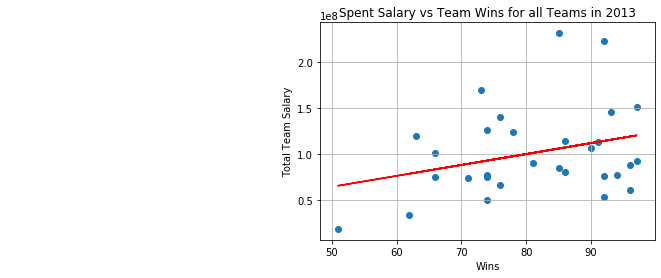

In [12]:
#graph salaries vs team wins for all teams in 2013
x_value=new_df['W']
y_value=new_df['salary']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept
plt.plot(x_value,y,"r-")
plt.annotate(line,(0,0),fontsize=15, color='red')
plt.scatter(new_df['W'],new_df['salary'])
plt.xlabel("Wins")
plt.ylabel('Total Team Salary')
plt.title("Spent Salary vs Team Wins for all Teams in 2013")
plt.grid()
print("the r value is " + str(rvalue))

the r value is 0.2651369022466299


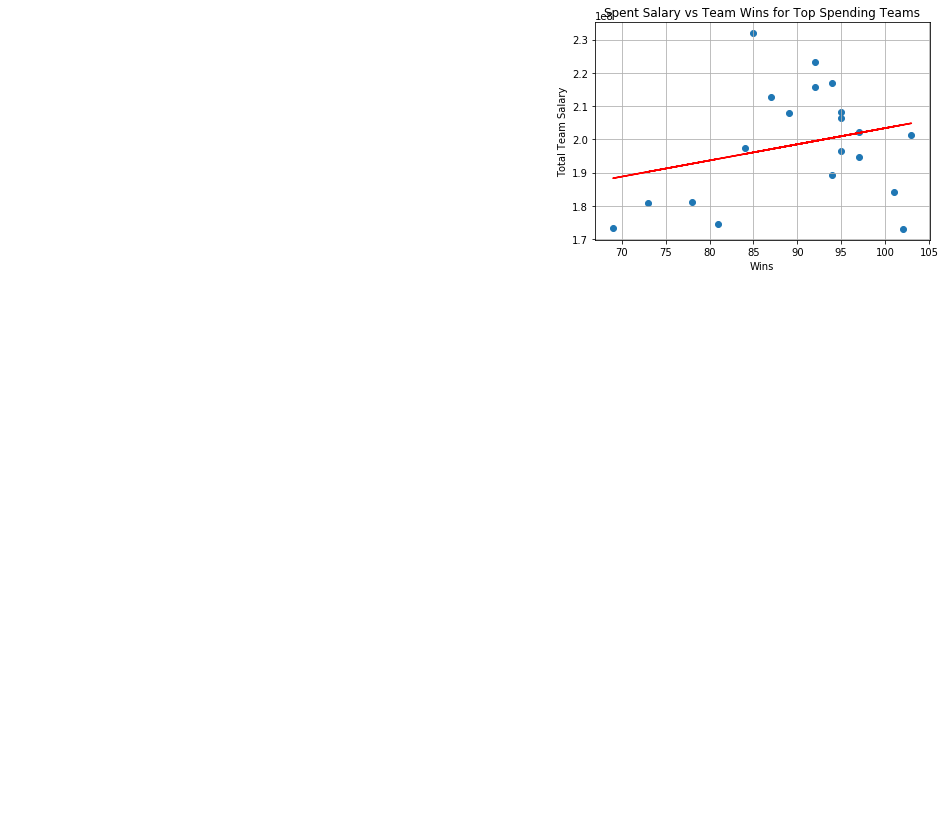

In [13]:
#Graph salary for the top few teams by salary spending
x_value=small_df['W']
y_value=small_df['salary']
(slope,intercept,rvalue,pvalue,stderr)=linregress(x_value,y_value)
line="y =" + str(slope.round(2)) + "x + " + str(intercept.round(2))
y=(slope*(x_value))+intercept
plt.plot(x_value,y,"r-")
plt.annotate(line,(0,0),fontsize=15, color='red')
plt.scatter(small_df['W'],small_df['salary'])
plt.xlabel("Wins")
plt.ylabel('Total Team Salary')
plt.title("Spent Salary vs Team Wins for Top Spending Teams")
plt.grid()
print("the r value is " + str(rvalue))